# Protocol-py

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,root_mean_squared_error

### Loading Dataset

In [2]:
df = pd.read_csv('Protocol-py.csv')

In [3]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [4]:
df.shape

(30, 3)

#### Checking if dataset contains null values

In [5]:
df.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

#### Dropping Columns 'Unnamed:0' as it serve no purpose for model building

In [6]:
df.drop(columns='Unnamed: 0',inplace=True)

In [7]:
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


### Data Visulalization

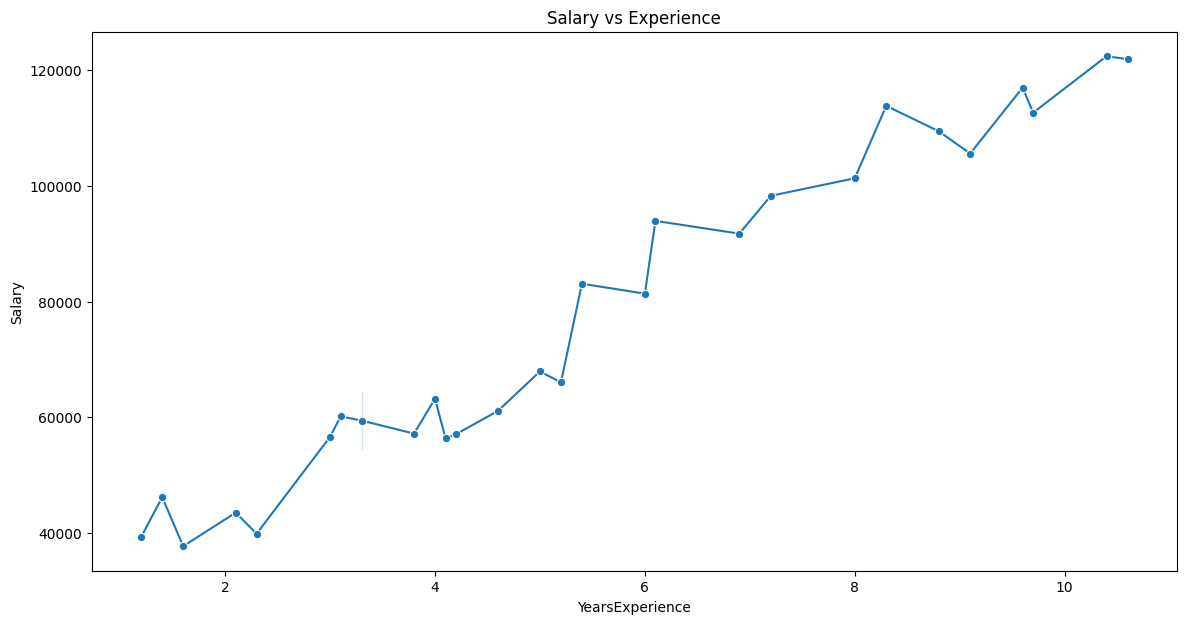

In [8]:
plt.figure(figsize=(14,7))
sns.lineplot(data=df,x='YearsExperience',y='Salary',marker='o')
plt.title('Salary vs Experience')
plt.show()

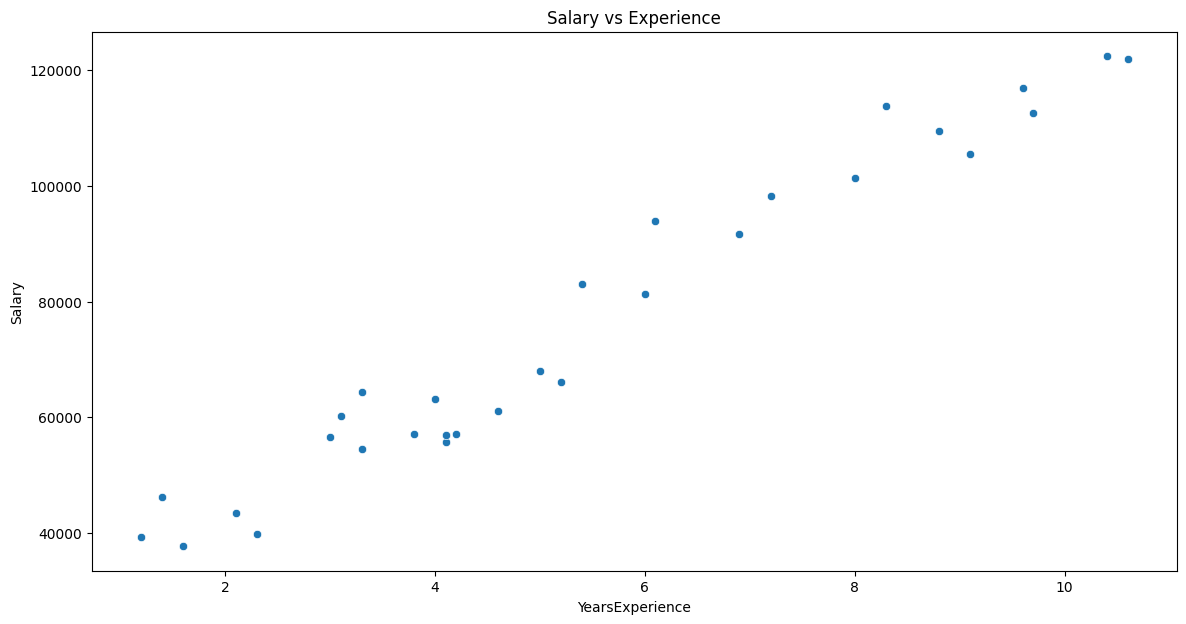

In [9]:
plt.figure(figsize=(14,7))
sns.scatterplot(data=df,x='YearsExperience',y='Salary',marker='o')
plt.title('Salary vs Experience')
plt.show()

### Data preprocessing

Scaling the input and taget feature to alow algorithm to converge faster 

In [10]:
scaler = StandardScaler()
Standardized_features=scaler.fit_transform(df)

In [11]:
Standardized_features

array([[-1.51005294, -1.36011263],
       [-1.43837321, -1.10552744],
       [-1.36669348, -1.419919  ],
       [-1.18749416, -1.20495739],
       [-1.11581443, -1.33978143],
       [-0.86493538, -0.71830716],
       [-0.82909552, -0.58815781],
       [-0.75741579, -0.79981746],
       [-0.75741579, -0.42881019],
       [-0.57821647, -0.69801306],
       [-0.50653674, -0.47433279],
       [-0.47069688, -0.74976858],
       [-0.47069688, -0.70662043],
       [-0.43485702, -0.70201994],
       [-0.29149756, -0.55250402],
       [-0.1481381 , -0.29921736],
       [-0.07645838, -0.37004264],
       [-0.00477865,  0.26285865],
       [ 0.21026054,  0.19885989],
       [ 0.2461004 ,  0.66547573],
       [ 0.53281931,  0.58377993],
       [ 0.6403389 ,  0.82623317],
       [ 0.92705781,  0.93861127],
       [ 1.03457741,  1.40274136],
       [ 1.21377673,  1.24020308],
       [ 1.32129632,  1.09740238],
       [ 1.50049564,  1.51986835],
       [ 1.5363355 ,  1.3590738 ],
       [ 1.78721455,

In [12]:
feature = Standardized_features[:,0]
target = Standardized_features[:,1]

#### Dividing dataset as training and test data for model evaluation

In [13]:
X_train,X_test,y_train,y_test = train_test_split(feature,target,test_size=0.2,random_state=42)

### Implementing Linear Regression model

In [14]:
lr = LinearRegression()
lr.fit(X_train.reshape(-1,1),y_train)

LinearRegression()

In [15]:
pred = lr.predict(X_test.reshape(-1,1))
y_pred_train = lr.predict(X_train.reshape(-1,1))

### Evaluating R2 and RMSE score of our model on train and test data

In [20]:
r2_train = r2_score(y_pred_train,y_train)
r2_test = r2_score(pred,y_test)
rmse_train = root_mean_squared_error(y_pred_train,y_train)
rmse_test = root_mean_squared_error(pred,y_test)

print('R2 score of Linear Regression model on train data is :',r2_train)
print('Root mean squared error of Linear Regression model on train data is :',rmse_train)
print('\n')
print('R2 score of Linear Regression model on test data is :',r2_test)
print('Root mean squared error of Linear Regression model on test data is :',rmse_test)

R2 score of Linear Regression model on train data is : 0.963236530497694
Root mean squared error of Linear Regression model on train data is : 0.19314571726299515


R2 score of Linear Regression model on test data is : 0.896183873758733
Root mean squared error of Linear Regression model on test data is : 0.26189564518156905


### Best Fit Line of test and train data

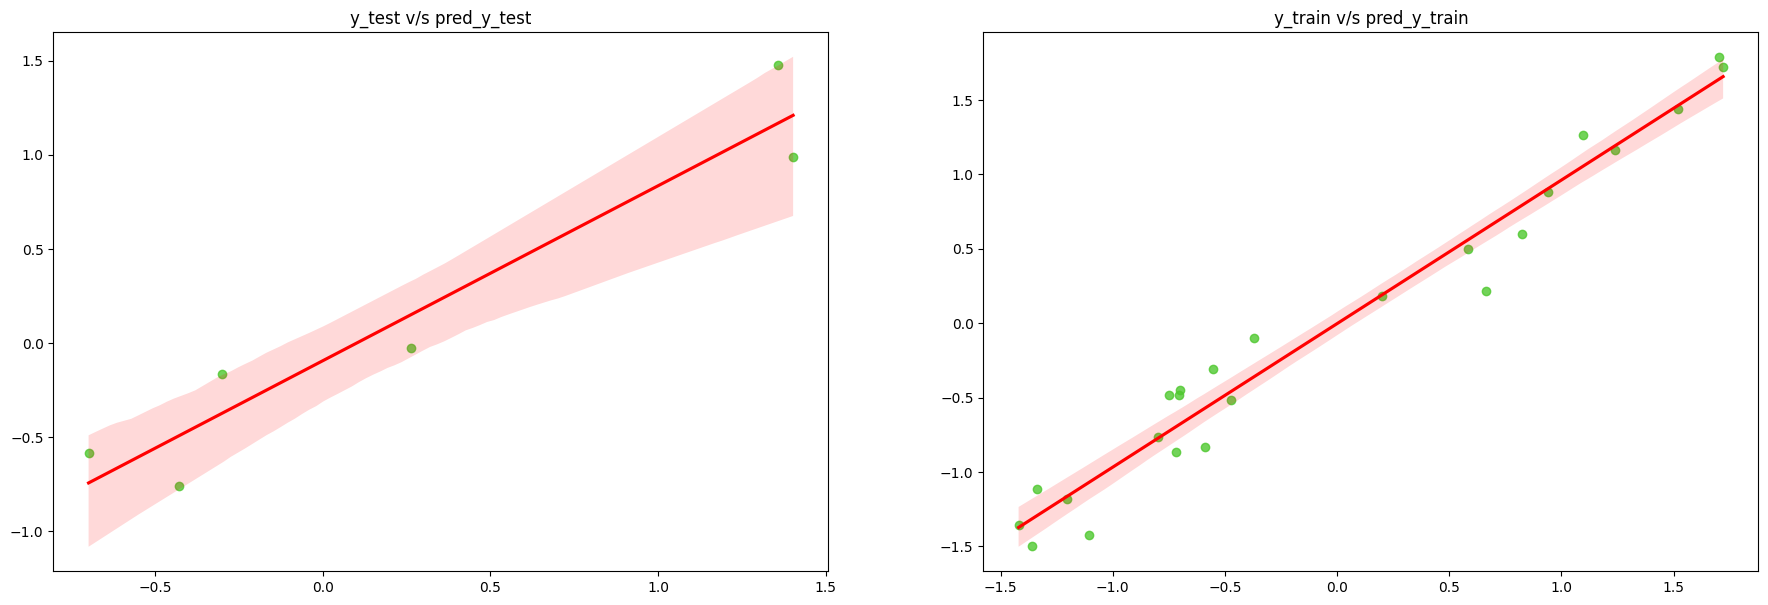

In [17]:
fig,axes=plt.subplots(1,2,figsize=(22,7))
axes[0].set_title('y_test v/s pred_y_test')
sns.regplot(ax=axes[0],x=y_test,y=pred,scatter_kws={'color':'#4fc82f'},line_kws={'color':'r'})
axes[1].set_title('y_train v/s pred_y_train')
sns.regplot(ax=axes[1],x=y_train,y=y_pred_train,scatter_kws={'color':'#4fc82f'},line_kws={'color':'r'})
plt.show()